Question 1:

The standard deviation measures how spread out the values in a dataset are from the mean. It gives a sense of how much individual data points differ from the average value.
On the other hand, the standard error of the mean measures how much the sample mean is expected to vary if you took multiple samples from the same population.
In summary, the standard deviation is about the spread of the data itself, while the standard error of the mean is about the precision of the sample mean as an estimate of the population mean.

Standard Deviation captures the idea of variability within the dataset.
Standard Error of the Mean captures the idea of precision in estimating the population mean from the sample. 

The link for ChatGPT: https://chatgpt.com/share/66ff42cf-a970-8000-828a-0cb8b9fdad3b

Question 2:

Firstly, we need to calculate the standard error of the mean by dividing the sample's standard deviation by the square root of the sample size.
Secondly, multiply the SEM by 1.96 approximately.
Last but not least, add and subtract this margin of error from the sample mean to get the confidence interval.
Then we are done.

The link for ChatGPT to help me solve the question: https://chatgpt.com/share/66ff56b1-bad0-8000-afcd-347bf4390fad

Question 3:

Firstly, randomly resample the data with replacement to create many bootstrapped samples.
Secondly, compute the mean for each of these bootstrapped samples.
Thirdly, arrange the bootstrapped means in ascending order.
Finally, identify the 2.5th percentile and the 97.5th percentile of the sorted bootstrapped means. These percentiles form the lower and upper bounds of the 95% confidence interval.
The 2.5th percentile is around 1.5.
The 97.5th percentile is around 2.7.
Hence, the 95% bootstrapped confidence interval would be [1.5, 2.7].

Question 4:

In [4]:
import numpy as np
import pandas as pd
import scipy.stats as stats

# Sample data: Annual incomes from the table above
data = {
    "Annual Income": [
        45000, 80000, 30000, 50000, 120000,
        85000, 40000, 25000, 28000, 95000,
        52000, 78000, 38000, 110000, 48000,
        35000, 76000, 82000, 34000, 115000,
        47000, 76000, 33000, 54000, 39000,
        100000, 46000, 79000, 42000, 20000,
        90000
    ]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Function to perform bootstrap and calculate confidence interval
def bootstrap_ci(data, num_bootstrap=10000, alpha=0.05):
    means = []
    n = len(data)
    
    for _ in range(num_bootstrap):
        sample = np.random.choice(data, size=n, replace=True)
        means.append(np.mean(sample))
    
    lower_bound = np.percentile(means, 100 * (alpha / 2))
    upper_bound = np.percentile(means, 100 * (1 - alpha / 2))
    
    return lower_bound, upper_bound

# Calculate the 95% confidence interval
ci = bootstrap_ci(df['Annual Income'].values)
print(f"95% Bootstrap Confidence Interval for the Population Mean: {ci}")

95% Bootstrap Confidence Interval for the Population Mean: (50966.93548387097, 71193.54838709677)


In [5]:
import numpy as np
import pandas as pd

# Sample data: Annual incomes from the previous table
data = {
    "Annual Income": [
        45000, 80000, 30000, 50000, 120000,
        85000, 40000, 25000, 28000, 95000,
        52000, 78000, 38000, 110000, 48000,
        35000, 76000, 82000, 34000, 115000,
        47000, 76000, 33000, 54000, 39000,
        100000, 46000, 79000, 42000, 20000,
        90000
    ]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Function to perform bootstrap and calculate confidence interval for the median
def bootstrap_ci_median(data, num_bootstrap=10000, alpha=0.05):
    medians = []
    n = len(data)
    
    for _ in range(num_bootstrap):
        sample = np.random.choice(data, size=n, replace=True)
        medians.append(np.median(sample))
    
    lower_bound = np.percentile(medians, 100 * (alpha / 2))
    upper_bound = np.percentile(medians, 100 * (1 - alpha / 2))
    
    return lower_bound, upper_bound

# Calculate the 95% confidence interval for the median
ci_median = bootstrap_ci_median(df['Annual Income'].values)
print(f"95% Bootstrap Confidence Interval for the Population Median: {ci_median}")

95% Bootstrap Confidence Interval for the Population Median: (42000.0, 78000.0)


Above are the two code for the question.

The link for ChatGPT:https://chatgpt.com/share/66ff64b4-797c-8000-a583-1dcb9e7d874b

Question 5:

When we create a confidence interval, we’re using the sample statistic to make an educated guess about the population parameter. The confidence interval provides a range that likely contains the population parameter, acknowledging that our sample statistic is just an estimate and there is some uncertainty involved.

PS: searched online for support.

Question 6:

A:Bootstrapping is a statistical method used to estimate the distribution of a sample statistic by resampling with replacement from the original data. The steps are as follows.
1.Start with original sample. 2.Resampling. 3.Calculate Statistics. 4.Get a Distribution of the Statistics. 5.Estimate confidence intervals.

B:Bootstrapping is a powerful tool for making inferences about a population based on a sample, especially when we don’t want to rely on strict assumptions about the population’s distribution. It allows us to estimate the accuracy and variability of our sample statistics in a straightforward and intuitive way.

C:Still start with the sample of size from the population, randomly resample with replacement from the original sample to create many bootstrapped samples, calculate the mean and determine the 2.5th and 97.5th percentiles to create a 95% confidence interval. Finally, the difference comes that check if the hypothesized mean falls within this 95% confidence interval. It is plausible if it does. Otherwise, no.

Question 7:

First subquestion:The confidence Interval is a range of values within which we expect the true population parameter to lie, with a certain level of confidence and the hypothes is that there is no effect or difference. If zero is within the confidence interval, it means that the true effect could be zero. Therefore, we don’t have enough evidence to say that the effect is different from zero.

Second subquestion:This would indicate that zero is not a plausible value for the true effect, suggesting that there is a statistically significant effect.

Question 8:

The Null Hypothesis (H₀) states that the new vaccine has no effect on health, meaning that there is no statistically significant difference between the initial and final health scores of the patients who received the vaccine.

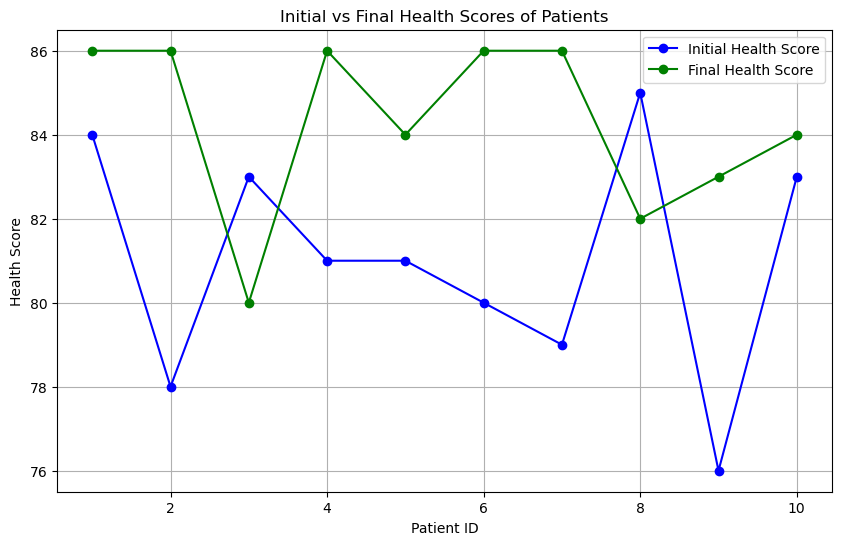

(-2.5900615612703937, 0.02921052381549256)

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Set random seed for reproducibility
np.random.seed(42)

# Data: Initial and Final Health Scores
initial_scores = df["InitialHealthScore"]
final_scores = df["FinalHealthScore"]

# Plotting initial vs final health scores
plt.figure(figsize=(10, 6))
plt.plot(df['PatientID'], initial_scores, label='Initial Health Score', marker='o', color='blue')
plt.plot(df['PatientID'], final_scores, label='Final Health Score', marker='o', color='green')
plt.xlabel('Patient ID')
plt.ylabel('Health Score')
plt.title('Initial vs Final Health Scores of Patients')
plt.legend()
plt.grid(True)
plt.show()

# Performing a paired t-test to compare initial and final health scores
t_stat, p_value = stats.ttest_rel(initial_scores, final_scores)

t_stat, p_value

Date visualization:The plot above shows the Initial Health Score and Final Health Score for each patient. This gives us a visual indication of how patients' health scores changed after receiving the vaccine. There appears to be an overall increase in health scores, but we need to confirm whether this change is statistically significant.

Quantitative Analysis:
We performed a paired t-test to compare the initial and final health scores. The test produced the following results:
t-statistic: -2.59
p-value: 0.029

Conclusion regarding Null Hypothesis:
The p-value of 0.029 is less than the common significance level of 0.05. This means we can reject the null hypothesis of "no effect." Therefore, there is evidence to suggest that the vaccine had a statistically significant positive effect on patients' health scores.

Further consideration is contained in the code above, and also we need to pay attention that the sample size is too small with only 10 patients.

Question 9:

Yes.